In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
homevalues = pd.read_csv("datafiles/single_family_home_values.csv")

In [17]:
#hvdf2 = homevalues.drop("estimated_value", axis = 1)
homevalues.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953


In [7]:
hvdf2 = homevalues[["bedrooms","bathrooms","rooms","squareFootage","lotSize", "yearBuilt", "priorSaleAmount", "estimated_value"]]
#hvdf2 = homevalues

In [8]:
hvdf2.dropna(axis = 0, inplace = True)

C:\Users\kndoa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
kmean = KMeans(n_clusters = 5, random_state = 0).fit(hvdf2)

In [10]:
labels = kmean.labels_
hvdf2["cluster"] = labels

C:\Users\kndoa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
hvdf2.head(10)

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount,estimated_value,cluster
0,3,2.0,6,1378,9968,2003.0,165700.0,239753,0
3,4,3.0,0,2400,11500,1956.0,0.0,494073,0
4,3,4.0,8,2305,5600,1998.0,0.0,513676,0
5,3,5.0,7,2051,6045,1996.0,339000.0,496062,0
6,4,4.0,8,2051,6315,1997.0,345000.0,514953,0
7,3,3.0,7,2051,8133,1997.0,225200.0,494321,0
8,3,3.0,7,1796,5038,1999.0,0.0,496079,0
9,3,3.0,0,2054,4050,2007.0,312000.0,424514,0
10,3,4.0,7,2568,6397,2000.0,530000.0,721350,3
11,3,2.0,6,1290,9000,1962.0,171000.0,331915,0


In [12]:
hvdf2["cluster"].value_counts()

0    6915
3    3527
1     551
2      83
4       2
Name: cluster, dtype: int64

In [13]:
hvdf2.groupby("cluster").mean()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount,estimated_value
cluster,,,,,,,,
0,2.466956,1.710557,5.362979,1142.067245,5490.108315,1929.980911,1.432807e+05,4.329151e+05
1,3.522686,4.647913,9.359347,3369.092559,7757.921960,1964.798548,7.796467e+05,1.781317e+06
2,3.927711,6.481928,11.132530,5345.240964,15184.385542,1972.686747,1.950700e+06,4.487871e+06
3,2.944145,2.711086,6.970230,1760.299688,5518.154522,1920.753615,3.681264e+05,7.510209e+05
4,3.000000,4.500000,9.000000,3748.000000,8597.500000,1998.000000,1.375006e+07,2.013114e+06


In [14]:
#evaluate cluster performance

from sklearn.metrics import silhouette_score

for i in range(3, 10):
    kmeans=KMeans(n_clusters=i).fit(hvdf2)
    labels = kmeans.labels_
    print(silhouette_score(hvdf2,  labels))

0.7188169365228634
0.4807287118692814
0.48064311751301825
0.4687280331504114
0.46433415221107066
0.4668394604345779
0.3867661247468073


In [15]:
bedbath = hvdf2[["bedrooms", "bathrooms"]]

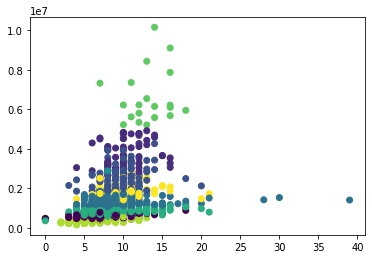

In [16]:
plt.scatter(hvdf2["rooms"], hvdf2["estimated_value"], c=labels)